In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from bounce import state
from bounce import driver
import numpy as np

In [3]:
label = 'Emcee package test'
N_walkers = 20
N_iterations = 320*N_walkers
emcee_init_scale = {"m":0.00001, "a":.01, "h":0.001, "k":0.001, "l":0.01*2.*np.pi}

In [4]:
initial_state = state.State(planets=[{"m":0.001, "a":0.1, "h":0.1, "k":0.15, "l":1.0}])
initial_state.hillRadiusFactor = 1.

np.random.seed(2018)
obs = driver.create_obs(initial_state, 100, 5.0e-4, 5.0e-5, 1.0)

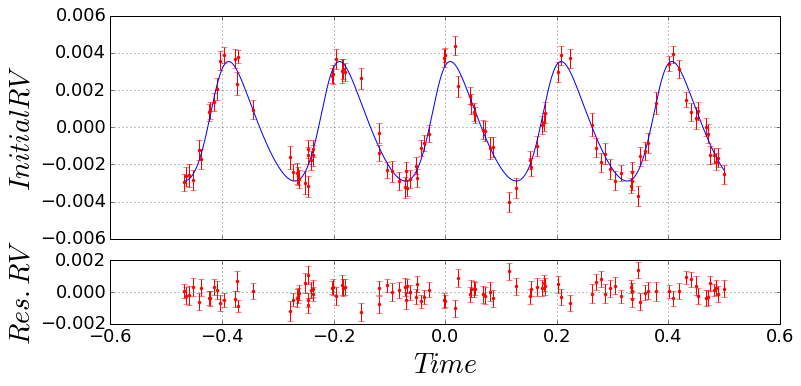

In [5]:
%matplotlib inline
driver.plot_obs(initial_state, obs, [12,4])

In [6]:
np.random.seed()
emcee_bundle, emcee_bundle_hash = driver.run_emcee(label, 
                                                   N_iterations, 
                                                   initial_state, 
                                                   obs,
                                                   N_walkers,
                                                   emcee_init_scale,
                                                   printing_every=100)

Progress: 0.3125%, time: 2017-10-20 05:24:19.025283
Progress: 31.562%, time: 2017-10-20 05:24:33.859521
Progress: 62.813%, time: 2017-10-20 05:24:48.315677
Invalid state was proposed (m)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Collision! 2017-10-20 05:24:55.024094
Collision! 2017-10-20 05:24:56.715704
Invalid state was proposed (m)
Collision! 2017-10-20 05:24:58.821723
Invalid state was proposed (h & k)
Invalid state was proposed (m)
Progress: 94.062%, time: 2017-10-20 05:25:03.258085
Collision! 2017-10-20 05:25:04.041541
Error(s): 0
Acceptance rate: 56.750%
The id of the simulation is: 29a26bb0a11b78689b6ee03f6a08c290
The end time of the simulation is 2017-10-20 05:25:06.074935


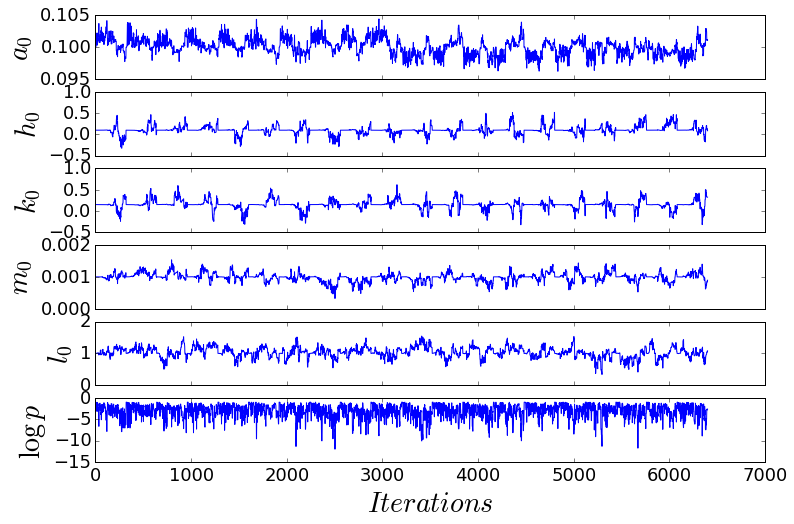

In [7]:
driver.plot_chains(emcee_bundle, [12,8])

In [8]:
driver.return_trimmed_results(emcee_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


Selected some 20 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$']
[  1.00101921e-01   1.03836008e-01   1.49137218e-01   9.88149473e-04
   1.03017830e+00]


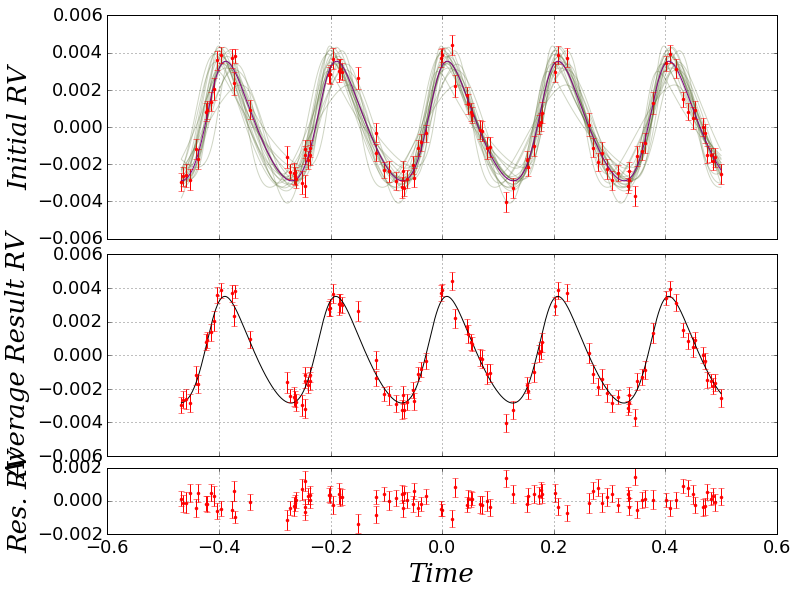

In [9]:
driver.plot_trimmed_results(emcee_bundle, 20, [12,4])